# Prepare the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import defaultdict

from sklearn.model_selection import train_test_split

In [2]:
credits = pd.read_csv('/Users/xhan/OneDrive/dataset/tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies = pd.read_csv('/Users/xhan/OneDrive/dataset/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')

In [3]:
movies_sub = movies.loc[:, ['id', 'original_title', 'genres']]
credits_sub = credits.loc[:, ['movie_id', 'cast', 'crew']].rename(columns={'movie_id':'id'})
df = movies_sub.merge(credits_sub)

In [4]:
def string_to_dict(df, col_name:str):
    """Convert string format info to dictionaries"""
    new_col = []
    for cell in df[col_name]:
        cell = json.loads(cell)
        new_col.append(cell)
    
    df[col_name+'_list'] = new_col
    del df[col_name]
    return df

In [5]:
for col_name in ['genres', 'cast', 'crew']:
    df = string_to_dict(df, col_name)

In [6]:
df.head(5)

,id,original_title,genres_list,cast_list,crew_list
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [7]:
# extract only the movie genres
for i, row in enumerate(df.genres_list):
    genres = []
    for item in row:
        genres.append(item['name'])
        df.at[i, 'genres_list'] = genres

In [8]:
# extract only the names of actors/actresses
for i, row in enumerate(df.cast_list):
    cast = []
    for item in row:
        cast.append(item['name'])
    df.at[i, 'cast_list'] = cast

In [9]:
# extract the names of director of the movie
for i, row in enumerate(df.crew_list):
    director_name = ''
    for item in row:
        if item['job'] == 'Director': director_name += item['name']
    df.at[i, 'crew_list'] = director_name

In [10]:
df.head(5)

,id,original_title,genres_list,cast_list,crew_list
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,206647,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


In [11]:
df1 = df.loc[:, ['original_title', 'genres_list', 'cast_list', 'crew_list']]

In [12]:
# drop movies with no cast/crew/genre info
for i, row in df1.iterrows():
    if row['cast_list'] == [] or row['crew_list'] == '' or row['genres_list'] == []:
        df1.drop(i, inplace=True)
    #df1.at[i, 'cast_list'] = ' '.join(row['cast_list'])

In [13]:
df1 = df1.dropna()
df1.head(5)

,original_title,genres_list,cast_list,crew_list
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski
2,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan
4,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton


In [14]:
df1['genre_1'] = None
df1['genre_2'] = None
df1['genre_3'] = None
df1['genre_4'] = None

In [15]:
df1.head(5)

,original_title,genres_list,cast_list,crew_list,genre_1,genre_2,genre_3,genre_4
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,None,None,None,None
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,None,None,None,None
2,Spectre,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,None,None,None,None
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,None,None,None,None
4,John Carter,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,None,None,None,None


In [16]:
df1 = df1.reset_index()
del df1['index']

In [17]:
for i, row in enumerate(df1.genres_list):
    for j, genre in enumerate(row):
        if j > 3: continue
        df1.at[i, 'genre_'+str(j+1)] = genre

### Delete cast/crew with less than three movies

In [18]:
# All directors: # of movies
directors_all = defaultdict(int)

for crew in df1.crew_list:
    directors_all[crew] += 1

sorted(directors_all.items(), key=lambda x: x[1], reverse=True)[:5]

[('Steven Spielberg', 26),
 ('Woody Allen', 21),
 ('Martin Scorsese', 20),
 ('Clint Eastwood', 20),
 ('Ridley Scott', 16)]

In [19]:
# drop directors who have less than three movies
directors_remove = [key for (key, value) in directors_all.items() if value <= 2]
for i, row in df1.iterrows():
    if row.crew_list in directors_remove: 
        df1.drop(i, inplace=True)

In [20]:
# All cast: # of movies
cast_all = defaultdict(int)

for cast in df1.cast_list:
    for p in cast:
        cast_all[p] += 1

sorted(cast_all.items(), key=lambda x: x[1], reverse=True)[:5]

[('Samuel L. Jackson', 53),
 ('Matt Damon', 41),
 ('Robert De Niro', 41),
 ('Morgan Freeman', 39),
 ('Bruce Willis', 38)]

In [21]:
# actors/actresses who have less than three movies
cast_remove = [key for (key, value) in cast_all.items() if value <= 2]

In [22]:
# drop directors who have too few movies
for i, row in df1.iterrows():
    df1.at[i, 'cast_list'] = list(set(row.cast_list) - set(cast_remove))
#     for j, name in enumerate(row.cast_list):
#         row['cast_list'][j] = name.replace(' ', '')

In [23]:
df1.head(5)

,original_title,genres_list,cast_list,crew_list,genre_1,genre_2,genre_3,genre_4
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[Giovanni Ribisi, Stephen Lang, Wes Studi, Sam...",James Cameron,Action,Adventure,Fantasy,Science Fiction
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[Orlando Bloom, Johnny Depp, Peter Donald Bada...",Gore Verbinski,Adventure,Fantasy,Action,None
2,Spectre,"[Action, Adventure, Crime]","[Léa Seydoux, Dave Bautista, Neve Gachev, Jesp...",Sam Mendes,Action,Adventure,Crime,None
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[Noel Gugliemi, Nestor Carbonell, Rob Brown, M...",Christopher Nolan,Action,Crime,Drama,Thriller
4,John Carter,"[Action, Adventure, Science Fiction]","[Dominic West, Nicholas Woodeson, Lynn Collins...",Andrew Stanton,Action,Adventure,Science Fiction,None


### Genres Overview

In [24]:
all_genres = defaultdict(int)

for row in df1.genres_list:
    for item in row:
        all_genres[item] += 1

all_genres

defaultdict(int,
            {'Action': 710,
             'Adventure': 500,
             'Fantasy': 275,
             'Science Fiction': 303,
             'Crime': 425,
             'Drama': 1197,
             'Thriller': 719,
             'Family': 226,
             'Western': 45,
             'Comedy': 928,
             'Romance': 478,
             'Horror': 207,
             'Animation': 58,
             'Mystery': 211,
             'History': 105,
             'War': 92,
             'Music': 88,
             'Documentary': 24,
             'Foreign': 2,
             'TV Movie': 1})

In [67]:
genres_list = sorted(all_genres.items(), key=lambda x: x[1], reverse=True)
genres_list

[('Drama', 1197),
 ('Comedy', 928),
 ('Thriller', 719),
 ('Action', 710),
 ('Adventure', 500),
 ('Romance', 478),
 ('Crime', 425),
 ('Science Fiction', 303),
 ('Fantasy', 275),
 ('Family', 226),
 ('Mystery', 211),
 ('Horror', 207),
 ('History', 105),
 ('War', 92),
 ('Music', 88),
 ('Animation', 58),
 ('Western', 45),
 ('Documentary', 24),
 ('Foreign', 2),
 ('TV Movie', 1)]

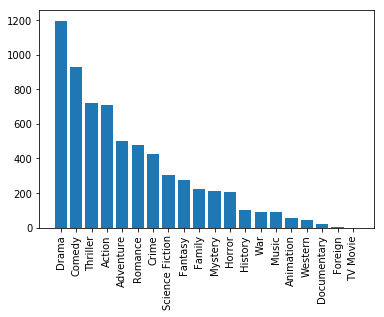

In [68]:
plt.bar(x = [x[0] for x in genres_list], height = [y[1] for y in genres_list])
plt.xticks(rotation=90)
plt.show()

## Cast vs. Genres

In [26]:
for i, row in df1.iterrows():
    df1.at[i, 'cast_list'] = ' '.join(row['cast_list'])

In [27]:
df1.head(5)

,original_title,genres_list,cast_list,crew_list,genre_1,genre_2,genre_3,genre_4
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]",Giovanni Ribisi Stephen Lang Wes Studi Sam Wor...,James Cameron,Action,Adventure,Fantasy,Science Fiction
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",Orlando Bloom Johnny Depp Peter Donald Badalam...,Gore Verbinski,Adventure,Fantasy,Action,None
2,Spectre,"[Action, Adventure, Crime]",Léa Seydoux Dave Bautista Neve Gachev Jesper C...,Sam Mendes,Action,Adventure,Crime,None
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",Noel Gugliemi Nestor Carbonell Rob Brown Mark ...,Christopher Nolan,Action,Crime,Drama,Thriller
4,John Carter,"[Action, Adventure, Science Fiction]",Dominic West Nicholas Woodeson Lynn Collins Br...,Andrew Stanton,Action,Adventure,Science Fiction,None


In [28]:
# Fit model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, hamming_loss
from sklearn.metrics import roc_auc_score

### Baseline: 

### One-vs-Rest

In [73]:
train_data, test_data, train_labels, test_labels = train_test_split(df1.cast_list, df1.genres_list, test_size=0.1)

In [74]:
from sklearn.preprocessing import MultiLabelBinarizer
lb = MultiLabelBinarizer()
train_labels_bin = lb.fit_transform(np.array(train_labels))
test_labels_bin = lb.transform(np.array(test_labels))

from sklearn.multiclass import OneVsRestClassifier
# Cs = 10**np.linspace(-3, 3, 50)

In [75]:
classifier = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1, 2), tokenizer=None, 
                                                      preprocessor=None, stop_words=None)),
                       ('tfidf', TfidfTransformer()),
                       ('clf', OneVsRestClassifier(LinearSVC(C=0.65, loss='hinge', multi_class='ovr')))])
classifier.fit(train_data, train_labels_bin)
predicted = classifier.predict(test_data)

accuracy = accuracy_score(y_pred=predicted, y_true=test_labels_bin)
f1 = f1_score(y_pred=predicted, y_true=test_labels_bin, average='micro')
precision = precision_score(y_pred=predicted, y_true=test_labels_bin, average='micro')
recall = recall_score(y_pred=predicted, y_true=test_labels_bin, average='micro')
hamming = hamming_loss(y_pred=predicted, y_true=test_labels_bin)

# print("Accuracy: {}".format(accuracy)) # subset accuracy
print("F1 score: {}".format(f1))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("Hamming-loss: {}\n".format(hamming))

F1 score: 0.3640661938534279
Precision: 0.7817258883248731
Recall: 0.23728813559322035
Hamming-loss: 0.1076



In [55]:
predicted[51]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
test_labels_bin[51]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [57]:
sorted(test_labels.iloc[51])

['Drama', 'Romance']